In [72]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [73]:
url = 'https://raw.githubusercontent.com/DereAbdulhameed/Machine-Learning-Methods/main/survey_lung_cancer.csv'
data = pd.read_csv(url)

In [74]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [34]:
data.shape

(309, 16)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [36]:
data['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

### Preprocessing

In [75]:
lb = LabelEncoder()
data['GENDER'] = lb.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = lb.fit_transform(data['LUNG_CANCER'])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

## Split the dataset into train and test sets

In [ ]:
# data =! X

In [77]:
X = data.drop(columns=['LUNG_CANCER'])
y = data.LUNG_CANCER

In [40]:
# feature_cols = X.columns

# Model Building

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 2022)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(247, 15)
(62, 15)
(247,)
(62,)


In [79]:
# import the algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [84]:
# instantiate the algorithm
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy') #max_depth indicates the depth/layers that would be displayed
# train/fit into your model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = clf.predict(X_test)

## Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 3,  4],
       [ 2, 53]])

#Visualize the Decision Tree

In [46]:
feature_cols

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [82]:
total_dataset = 309
0.8 * total_dataset

247.20000000000002

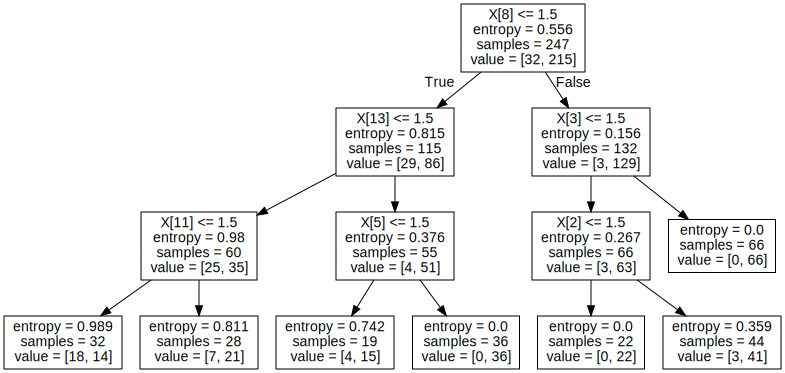

In [53]:
import graphviz
new_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(new_data)
graph.render("Gini")
graph



Note how the model resembles an upside down tree and each box represent a node in the tree.


*   Samples: the number of the observations in the node
*   Entropy: a measure of the node randomness
*   Value: the distribution of observation in each class
*   Class: the most common label in the node





In [83]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on the dataset is: ', accuracy_score(y_test, y_pred))

Accuracy Score on the dataset is:  0.9032258064516129


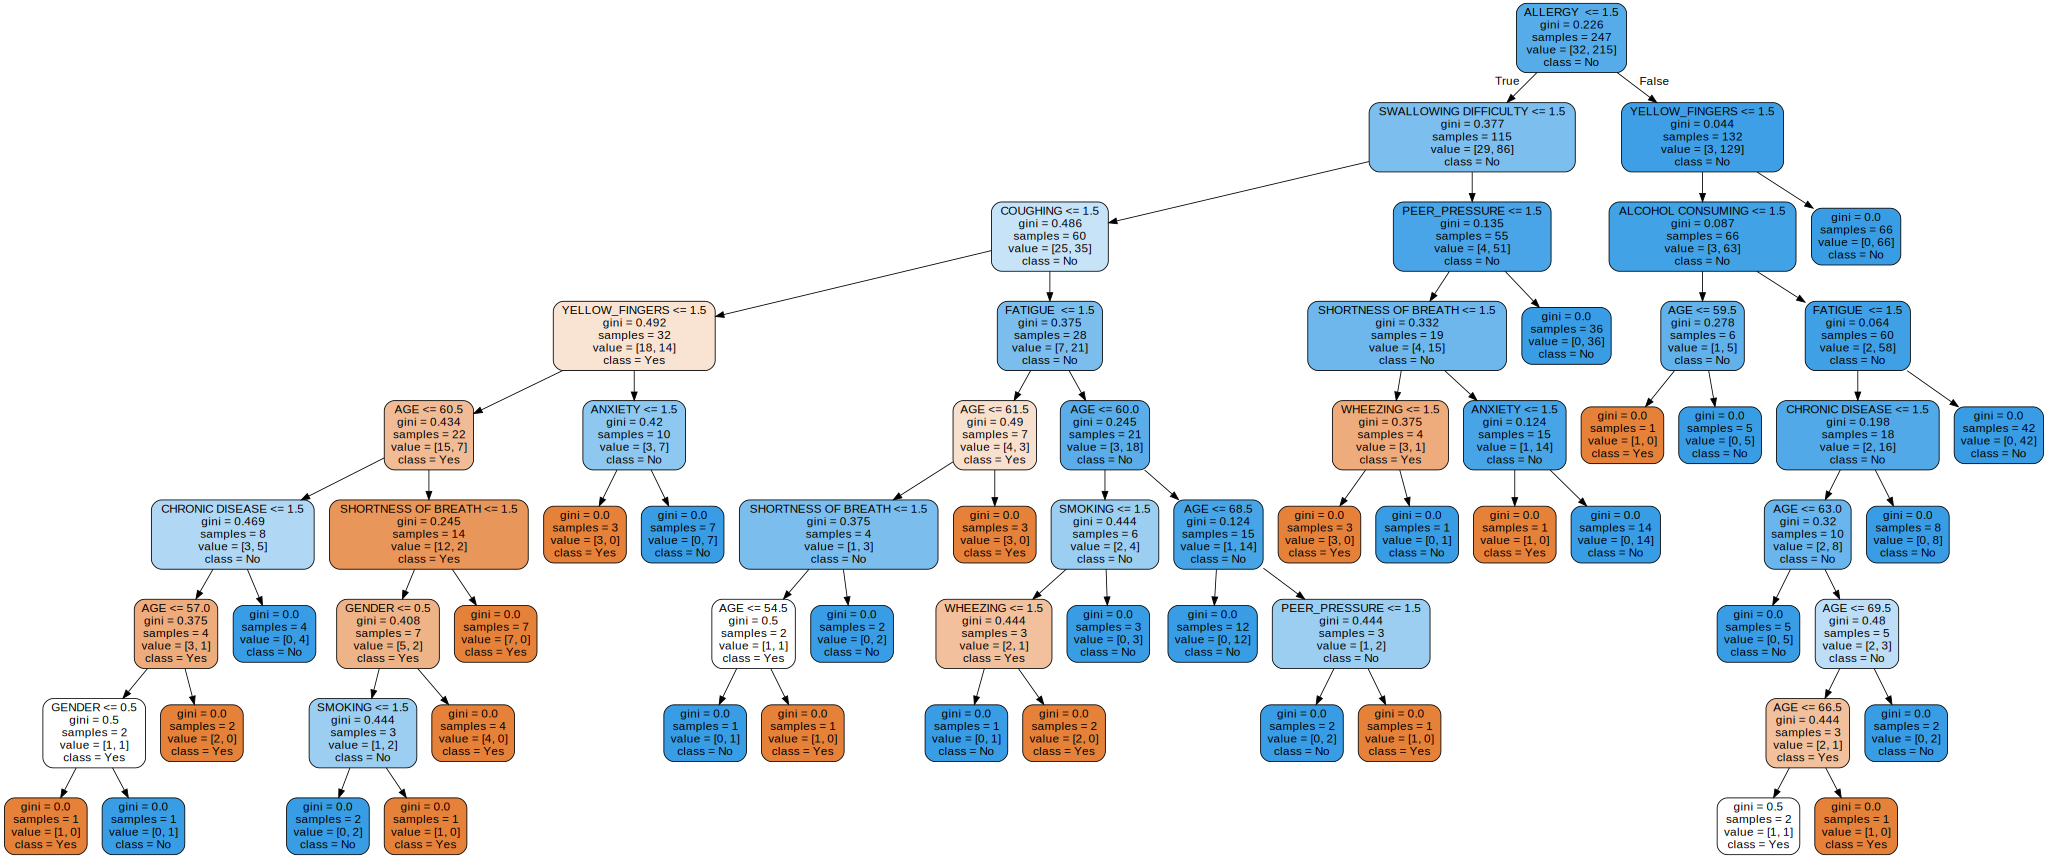

In [85]:
import graphviz
new_data = tree.export_graphviz(clf,out_file=None,feature_names=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                                                                 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                                                                 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                                                                 'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
                                class_names=['Yes', 'No'],
                                filled=True, rounded=True)

graph = graphviz.Source(new_data)
graph.render("Gini")
graph

At the top of the ree is the root node. Observations that satisfy this criteria printed at the top of the box are moc=ved to one branch while the rest are moved to the other. For the displayed tree above, node splits were chosen to lead an overall reduction of the entropy value. The nodes that do not branch off are called the terminal nodes or leaf nodes.

In [86]:
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                                                        'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                                                        'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                                                        'SWALLOWING DIFFICULTY', 'CHEST PAIN'] ,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

graph.write_png('tree.png')

True